1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np
import timeit
import numpy.random as npr
import math
import matplotlib.pyplot as plt

In [2]:
m = np.arange(12).reshape((3,4))
print(m)

print('Total mean',m.mean())
print('Mean for each col',m.mean(axis=0))
print('Mean for each row',m.mean(axis=1))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean 5.5
Mean for each col [4. 5. 6. 7.]
Mean for each row [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print('u =',u)
print('v =',v)

print('\nusing the function outer in numpy\n',np.outer(u,v))
print('\nusing a nested for loop or a list comprehension')
matrix = []
for i in range(len(u)):
    for j in range(len(v)):
        matrix.append(u[i]*v[j])
    
    
A = np.array(matrix).reshape(len(u),len(v))
print(A)

u = u[:,np.newaxis]
print('\nusing numpy broadcasting operations\n',u*v)


u = [1 3 5 7]
v = [2 4 6 8]

using the function outer in numpy
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

using a nested for loop or a list comprehension
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

using numpy broadcasting operations
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [4]:
import numpy.random as npr
A = npr.uniform(low=0.0, high=3.0, size=(10,6))
print('10 x 6 matrix with rand values between 0 and 3\n',A)
mask =(A<0.3)
A[A<0.3]=0
print('\n10 x 6 matrix modified\n',A)

10 x 6 matrix with rand values between 0 and 3
 [[2.39561486 2.33933217 0.37648552 2.2720816  1.53446759 0.78959433]
 [1.82326866 2.74344778 2.64435184 0.08533666 1.26113309 2.37184201]
 [1.78334975 1.32973821 0.42504    1.61110604 2.70405105 1.49593759]
 [2.3592787  1.02737609 2.45287512 0.57457852 0.29841439 0.76349164]
 [1.46775022 2.98885508 0.3926128  1.70434077 2.85262602 1.26366279]
 [0.28758479 0.46359097 0.10404149 1.45876574 0.16411385 1.24202759]
 [2.34765303 2.0512275  2.05276529 2.84719059 1.12328421 1.11144462]
 [1.67103086 1.32665456 0.77175384 2.87641975 0.94009971 2.23538838]
 [2.68550909 0.31527245 2.18841144 2.74151737 2.58375346 1.9937399 ]
 [0.53174175 1.04698468 1.87414418 2.58898848 1.4042547  2.94244595]]

10 x 6 matrix modified
 [[2.39561486 2.33933217 0.37648552 2.2720816  1.53446759 0.78959433]
 [1.82326866 2.74344778 2.64435184 0.         1.26113309 2.37184201]
 [1.78334975 1.32973821 0.42504    1.61110604 2.70405105 1.49593759]
 [2.3592787  1.02737609 2.452

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [5]:
pi = np.linspace(0,2*np.pi,100)
print('array pi:\n',pi)
print('Extract every 10th element using the slice notation:\n',pi[::10])
print('Reverse the array using the slice notation:\n',pi[::-1])
print('Extract elements where the absolute difference between the sin and cos functions evaluated for that element is  <0.1')
print(pi[np.sin(pi)-np.cos(pi)<0.1])



array pi:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.585053

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
mx = np.fromfunction(lambda i,j: (i+1)*(j+1), (10,10))
print('Matrix:\n',mx)

print('Find the trace of the matrix: ',np.sum(np.diag(mx)))
print('Extract the anti-diagonal matrix (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])):')
print(np.diag(np.fliplr(mx)))
print('Extract the diagonal offset by 1 upwards (this should be array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])):')
print(np.diag(mx,1))

Matrix:
 [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
Find the trace of the matrix:  385.0
Extract the anti-diagonal matrix (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])):
[10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
Extract the diagonal offset by 1 upwards (this should be array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])):
[ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [7]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print(dist)
dist_vertical = dist.reshape(10,1)
print(dist_vertical)
matrix = np.triu(dist-dist_vertical)
print(matrix)
matrix_km = matrix * 1.60934
print(matrix_km)

[   0  198  303  736  871 1175 1475 1544 1913 2448]
[[   0]
 [ 198]
 [ 303]
 [ 736]
 [ 871]
 [1175]
 [1475]
 [1544]
 [1913]
 [2448]]
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [   0    0  105  538  673  977 1277 1346 1715 2250]
 [   0    0    0  433  568  872 1172 1241 1610 2145]
 [   0    0    0    0  135  439  739  808 1177 1712]
 [   0    0    0    0    0  304  604  673 1042 1577]
 [   0    0    0    0    0    0  300  369  738 1273]
 [   0    0    0    0    0    0    0   69  438  973]
 [   0    0    0    0    0    0    0    0  369  904]
 [   0    0    0    0    0    0    0    0    0  535]
 [   0    0    0    0    0    0    0    0    0    0]]
[[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [   0.         0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [   0.         0.         0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
def primeNumbers(N):
    arr = np.arange(2,N)
    mask = (arr %2!=0)
    mask[0]=True
    arr = arr[mask]
    mask = mask[mask]
    for j in arr[arr>2]:
        for i in arr[arr<j]:
            if (j % i) == 0:
                arr = arr[arr != j]
                break
    return arr
    
def primeNumbersEratosthenes(N):
    arr = np.arange(2,N)
    mask = (arr % 2 != 0)
    arr = arr[mask]
    mask = mask[mask]
    primes = np.array([2])
    while arr.shape[0]:
        p = arr[0]
        arr = arr[arr % p != 0]
        
        primes =  np.append(primes, p)

    return primes

    
    
    
print(primeNumbers(100))
print(primeNumbersEratosthenes(100))

importing = "import numpy as np"
primeNumbersForMeasurments = '''
def primeNumbers(N):
    arr = np.arange(2,N)
    mask = (arr %2!=0)
    mask[0]=True
    arr = arr[mask]
    mask = mask[mask]
    for j in arr[arr>2]:
        for i in arr[arr<j]:
            if (j % i) == 0:
                arr = arr[arr != j]
                break
    return arr

primeNumbers(100)
'''

primeNumbersEratosthenesForMeasurments = '''
def primeNumbersEratosthenes(N):
    arr = np.arange(2,N)
    mask = (arr % 2 != 0)
    arr = arr[mask]
    mask = mask[mask]
    primes = np.array([2])
    while arr.shape[0]:
        p = arr[0]
        arr = arr[arr % p != 0]
        
        primes =  np.append(primes, p)

    return primes
primeNumbersEratosthenes(100)
'''

print("Execution time", timeit.timeit(stmt=primeNumbersForMeasurments, setup = importing, number=1000))
print("Execution time", timeit.timeit(stmt=primeNumbersEratosthenesForMeasurments, setup = importing, number=1000))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
Execution time 0.10583658399991691
Execution time 0.0869756669853814


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

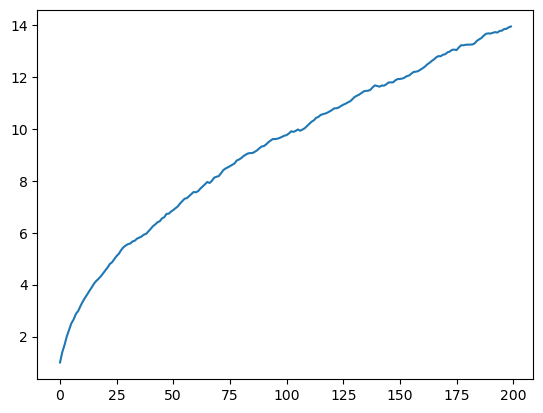

In [13]:
matrix = npr.randint(0, 2, (1000,200)) * 2 - 1
row_sums = np.cumsum(matrix, axis=1)
squared_rows = row_sums**2
mean = np.mean(squared_rows,axis=0)
dist = np.sqrt(mean)
plt.plot(dist)
plt.show()